In [ ]:
import numpy as np
from Layers import ReLU, SoftMax, MSE
def train_test_split(x_data, y_data, split_percentage=0.8, shuffle_train=True):
    x_train, x_test, y_train, y_test = [], [], [], []
    unique_digits = np.unique(y_data)

    for digit in unique_digits:
        digit_indices = np.where(y_data == digit)[0]
        split_point = int(len(digit_indices) * split_percentage)
        train_indices = digit_indices[:split_point]
        test_indices = digit_indices[split_point:]
        x_train.append(x_data[train_indices])
        y_train.append(y_data[train_indices])
        x_test.append(x_data[test_indices])
        y_test.append(y_data[test_indices])

    x_train = np.concatenate(x_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    x_test = np.concatenate(x_test, axis=0)
    y_test = np.concatenate(y_test, axis=0)

    if shuffle_train:
        shuffle_indices = np.random.permutation(len(x_train))
        x_train = x_train[shuffle_indices]
        y_train = y_train[shuffle_indices]

    return x_train.T, x_test.T, y_train.T, y_test.T

x_data = np.loadtxt('HW3_datafiles/MNISTnumImages5000_balanced.txt')  
y_data = np.loadtxt('HW3_datafiles/MNISTnumLabels5000_balanced.txt')
x_train, x_test,y_train,y_test = train_test_split(x_data, y_data, split_percentage=0.8, shuffle_train=True)

In [ ]:
import numpy as np

m = 5000

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)  # Optionally keep softmax for probabilities; remove if not needed for MSE
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y) / m  # MSE loss gradient for output layer
    dW2 = dZ2.dot(A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = dZ1.dot(X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 1000)


Iteration:  0
[4 4 4 ... 4 9 4] [8. 8. 1. ... 0. 9. 3.]
0.1055
Iteration:  10
[4 4 4 ... 0 9 4] [8. 8. 1. ... 0. 9. 3.]
0.13975
Iteration:  20
[8 4 4 ... 0 9 4] [8. 8. 1. ... 0. 9. 3.]
0.21025
Iteration:  30
[8 4 4 ... 0 9 4] [8. 8. 1. ... 0. 9. 3.]
0.2655
Iteration:  40
[8 1 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.38225
Iteration:  50
[8 1 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.464
Iteration:  60
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.528
Iteration:  70
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.578
Iteration:  80
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.6175
Iteration:  90
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.6635
Iteration:  100
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.69475
Iteration:  110
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.7185
Iteration:  120
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.738
Iteration:  130
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.751
Iteration:  140
[8 3 1 ... 0 9 3] [8. 8. 1. ... 0. 9. 3.]
0.7605
Iteration:  150
[8 3 1 ... 0 9 3] [8.

In [7]:
import matplotlib.pyplot as plt
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4.0


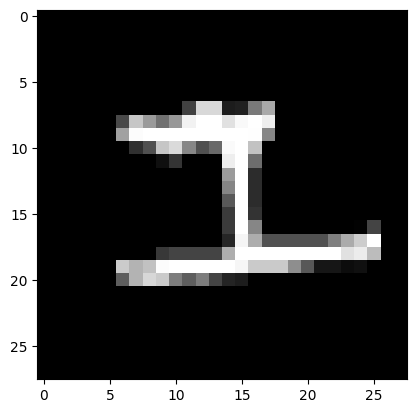

In [ ]:
import random

while True:
    index = random.randint(0, x_train.shape[1] - 1)
    test_prediction(index, W1, b1, W2, b2)
    input("Press Enter to continue...")